In [151]:
import csv
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Load Data
file = open('data/ballPosition.csv')
x_ball = []
y_ball = []
csvreader = csv.reader(file)
i = 0
for row in csvreader:
    i += 1
    if(row != ['x;y']):
        rc = row[0]
        row = rc.split(";")
        x_ball.append(int(row[0]))
        y_ball.append(int(row[1]))


In [153]:
def SimpleMovingAverage(x_ball, y_ball, window_size):

    moving_average_x = []
    moving_average_y = []
    i = 0

    while i < len(x_ball) - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
        window_x = x_ball[i : i + window_size]
        window_y = y_ball[i : i + window_size]
  
    # Calculate the average of current window
        window_average_x = round(sum(window_x) / window_size, 2)
        window_average_y = round(sum(window_y) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
        moving_average_x.append(window_average_x)
        moving_average_y.append(window_average_y)
      
    # Shift window to right by one position
        i += 1

    return moving_average_x, moving_average_y

In [154]:
def bouncingBallProjection(x_ball, y_ball):
    # Polyfit
    a, b, c = np.polyfit(x_ball, y_ball, 2)
    print ("A: ", a, " B: ", b, " C: ", c)

    leftToRight = True
    if x_ball[0] > x_ball[1]:
        leftToRight = False

    # determin the maximum of the parabola 
    xMaximum = - b / (2*a)
    yMaximum = (a * xMaximum * xMaximum + b * xMaximum + c)
    print("XMax: ", xMaximum, " YMax: ", yMaximum)

    h0 = yMaximum           # m
    hmax = h0               # keep track of the maximum height            
    h = h0
    hzero = 130              # groundlevel
    hstop = 20              # stop when bounce is less than 10

    g = abs(2*a)            # m/s/s
    v = 0                   # m/s, current velocity
    vmax = sqrt(2 * (hmax-hzero) * g)

    tzero = xMaximum          
    t = tzero               # starting time
    dt = 1                  # time step
    t_last = tzero + -sqrt(2*(h0-hzero)/g) # time we would have launched to get to h0 at t

    rho = 0.7               # coefficient of restitution
    tau = 0.01              # contact time for bounce
    freefall = True         # state: freefall or in contact

    x_predicted = []
    y_predicted = []

    while(hmax > hstop):
        if(freefall):
            hnew = h + v*dt - 0.5*g*dt*dt
            if(hnew<hzero):
                t = t_last + 2*sqrt(2*hmax/g)
                freefall = False
                t_last = t + tau
                h = hzero
            else:
                t = t + dt
                v = v - g*dt
                h = hnew
        else:
            t = t + tau
            vmax = vmax * rho
            v = vmax
            freefall = True
        hmax = 0.5*vmax*vmax/g
        y_predicted.append(h)
        if leftToRight:
            x_predicted.append(t)
        else:
            x_predicted.append(-t+ tzero * 2)

    return x_predicted, y_predicted


In [155]:
x_average, y_average = SimpleMovingAverage(x_ball, y_ball, 7)

x_predicted, y_predicted = bouncingBallProjection(x_ball, y_ball)

# calculate polynomial regression
x_poly = []
y_poly = []
x_poly_avg = []
y_poly_avg = []

# Polyfit
a, b, c = np.polyfit(x_ball, y_ball, 2)
a_avg, b_avg, c_avg = np.polyfit(x_average, y_average, 2)

for i in range(500, 1350):
  x_poly.append(i)
  y_poly.append(a * i*i + b* i+ c)
  x_poly_avg.append(i)
  y_poly_avg.append(a_avg * i*i + b_avg* i+ c_avg)


A:  -0.0032583895815033507  B:  6.113607214664399  C:  -2263.0180167385347
XMax:  938.1332498374416  YMax:  604.6710855228362


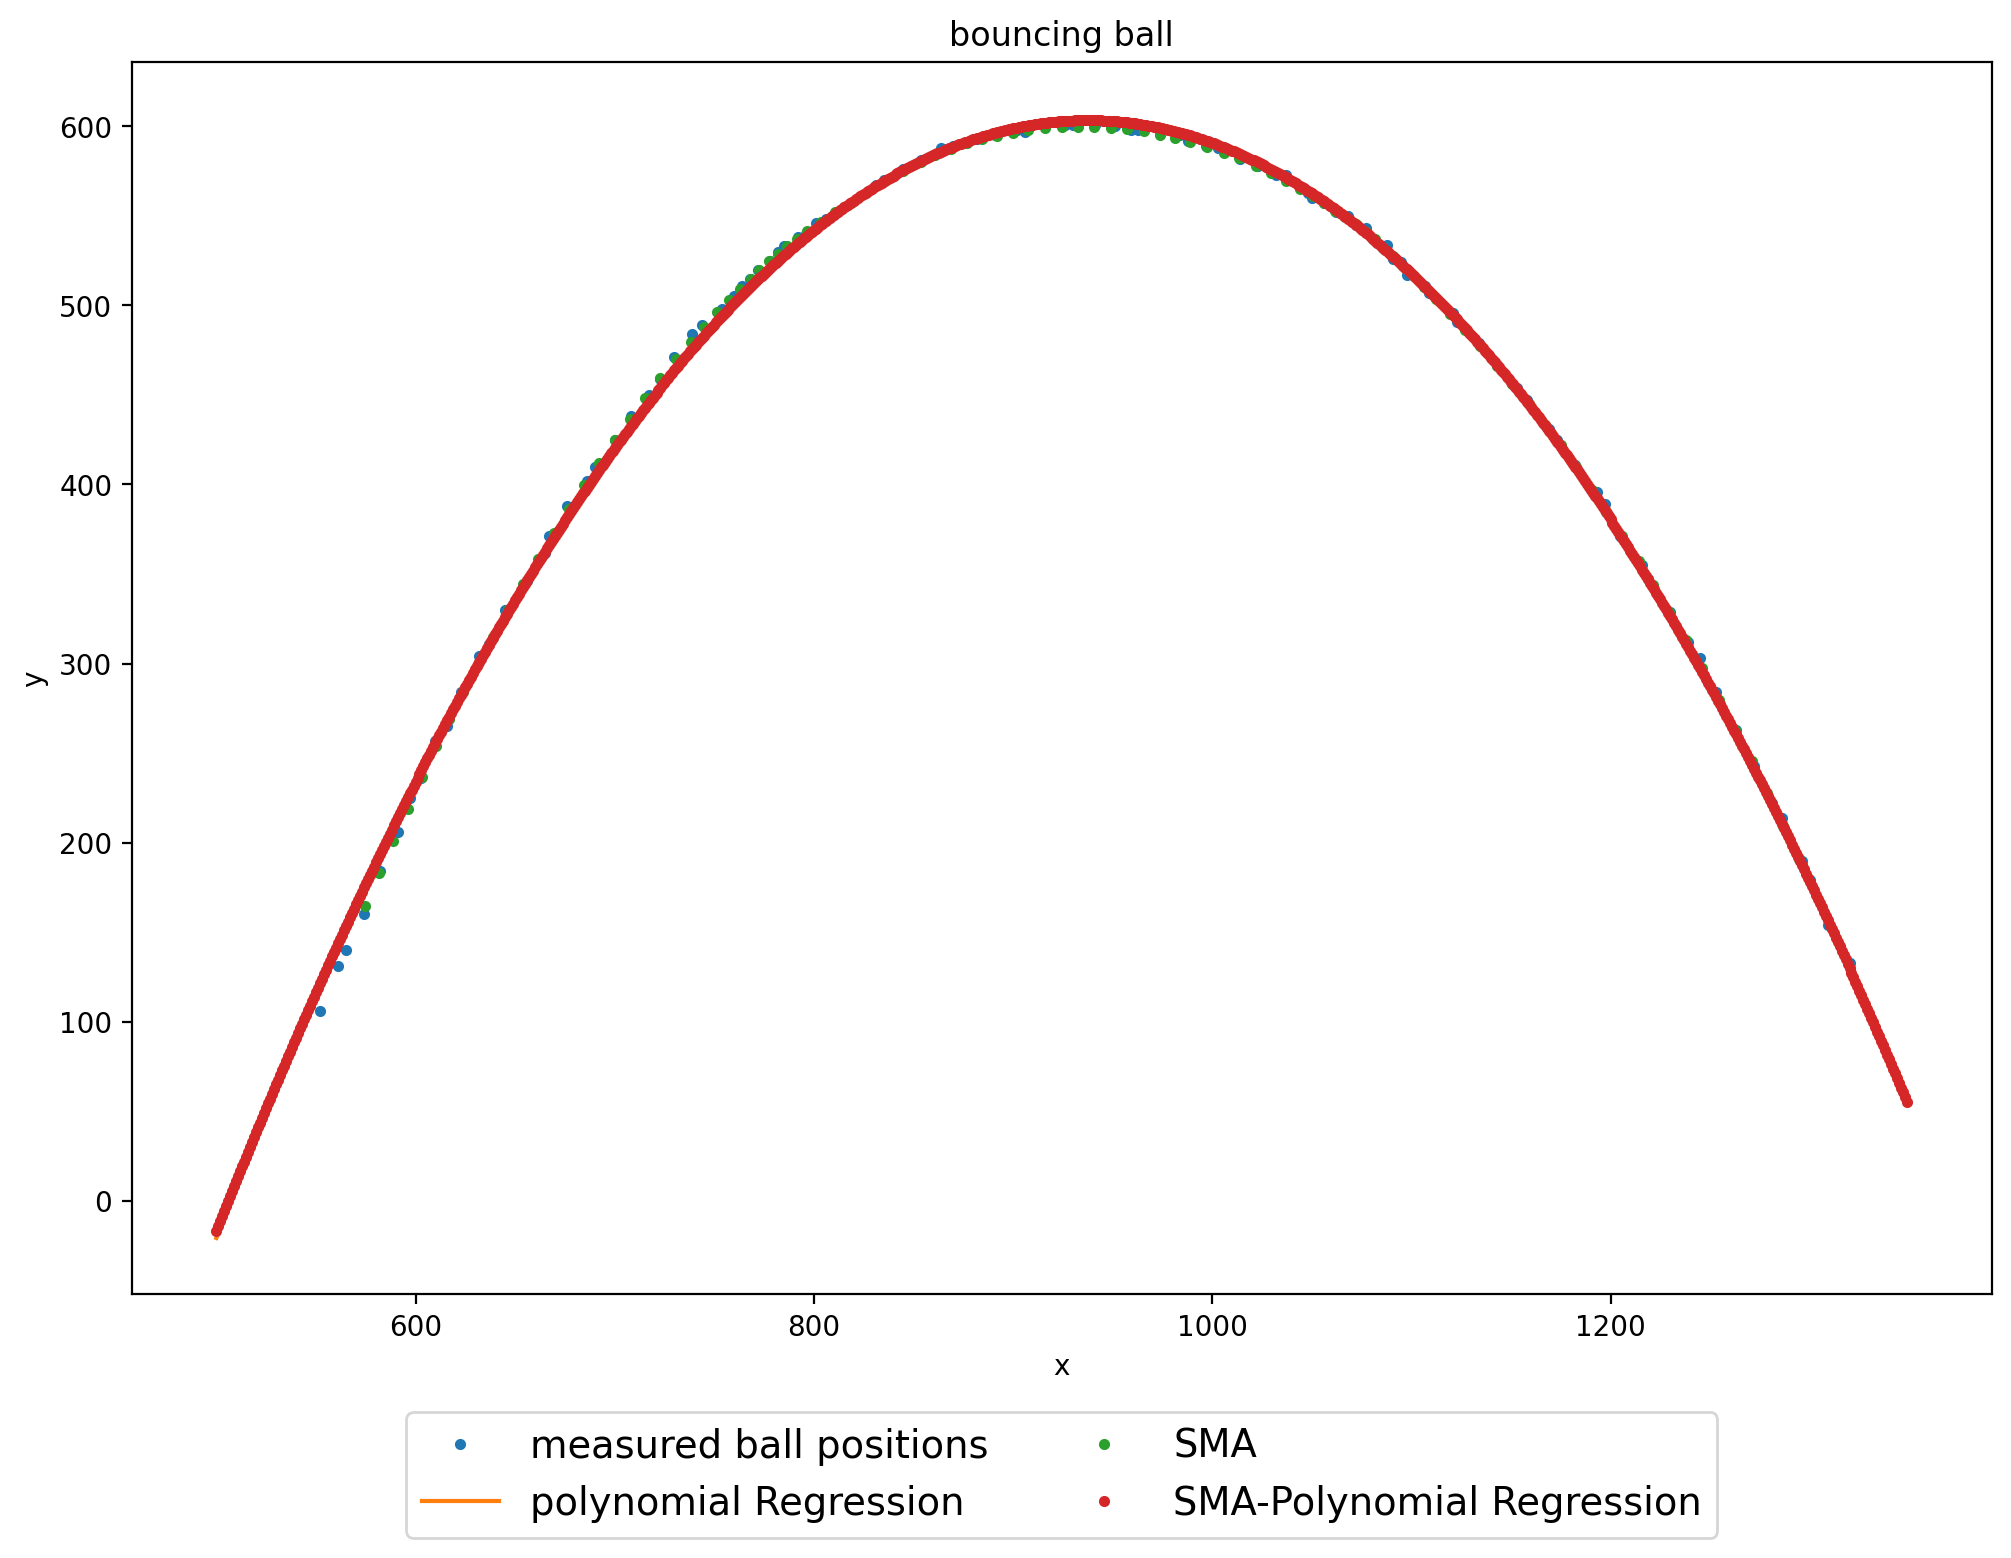

In [156]:
# Plot Results

plt.figure()
#plt.plot(x_predicted, y_predicted, label = "predicted ball positions")
plt.plot(x_ball, y_ball, '.', label = "measured ball positions")
#plt.plot((tzero,t), (hzero, hzero), label = "Groundlevel")
#plt.plot(x_poly, y_poly, label = "polynomial Regression")
plt.plot(x_average, y_average, '.', label = "SMA")
#plt.plot(x_poly_avg, y_poly_avg, '.', label = "SMA-Polynomial Regression")
plt.xlabel('x')
plt.ylabel('y')
plt.title('bouncing ball')

plt.rcParams['figure.dpi'] = 200
plt.legend(loc='upper center', prop={'size':13.89}, 
           bbox_to_anchor=(0.5, -0.08), ncol=2)
plt.rcParams['figure.figsize'] = [12, 8]